# SciPy

SciPy (Scientific Python) - це бібліотека для Python, яка надає набір інструментів для виконання наукових та інженерних обчислень. SciPy побудована на основі бібліотеки NumPy та складається з кількох модулів, з яких нам потрібний буде модуль для статистичних обчислень — scipy.stats.

### Вхідні дані
#### Контрольна група
- Кількість користувачів в групі: 7 015
- Кількість конверсій в групі: 139
- Значення конверсії: 1.98%
#### Альтернативна група
- Кількість користувачів в групі: 6 987
- Кількість конверсій в групі: 314
- Значення конверсії: 4.49%

In [28]:
import pandas as pd

test_data = pd.DataFrame(data  = {
    'test_group': ['a']*7015 + ['b']*6987,
    'conversion': [1] * 139 + [0] * (7015-139) + [1] * 314 + [0] * (6987 - 314)
})

test_data.head()

,test_group,conversion
0,a,1
1,a,1
2,a,1
3,a,1
4,a,1


In [29]:
# Перевіримо, чи все коректно згенерували:
test_data.groupby("test_group").describe()

conversion                                             
                count      mean       std  min  25%  50%  75%  max
test_group                                                        
a              7015.0  0.019815  0.139373  0.0  0.0  0.0  0.0  1.0
b              6987.0  0.044941  0.207189  0.0  0.0  0.0  0.0  1.0

## Тестування гіпотез за допомогою SciPy
### Критерій Стʼюдента

Нульова гіпотеза: середні двох незалежних вибірок не відрізняються.

In [3]:
from scipy import stats  # пакет в середині пакету

alpha = 0.05  # задаємо рівень значимості

In [31]:
statistic, pvalue = stats.ttest_ind(  # повертає результат t-тесту
    test_data[test_data["test_group"] == "a"]["conversion"],  # вибірка a
    test_data[test_data["test_group"] == "b"]["conversion"],  # вибірка b
    alternative="less",  # це означає, що ви проводите односторонній t-тест, де альтернативна гіпотеза стверджує, що середнє вибірки A менше середнього вибірки B.
)
# віддає 2 значення: статистику і p-value
# p-value - ймовірність того, що ми помилилися, відкидаючи нульову гіпотезу. Чим менше p-value, тим більше вірогідність того, що ми відкидаємо нульову гіпотезу.
# statistic: це t-статистика, величина, яка використовується для оцінки відмінностей між вибірками. Чим більше значення t-статистики, тим більше відмінностей між вибірками.

print(f"t-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}")

if pvalue < alpha:
    print("The difference is statistically significant, Null Hypothesis is rejected.")
else:
    print("The difference is insignificant, Null Hypothesis cannot rejected.")

t-statistic: -8.42, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


In [32]:
test_data[test_data["test_group"] == "a"]["conversion"]

0       1
1       1
2       1
3       1
4       1
       ..
7010    0
7011    0
7012    0
7013    0
7014    0
Name: conversion, Length: 7015, dtype: int64

### Критерій Хі-квадрат (додатково, не розглядається на занятті)

Цей критерій перевіряє залежність змінної від категорії, тобто у випадку A/B тесту — чи залежить метрика, яку ми аналізуємо, від тестової групи, в яку потрапив користувач.

Наприклад, дослідження може намагатися встановити, чи існує зв'язок між освітою та доходом, або між статтю та музичними перевагами. У обох випадках змінні категоріальні – отже, критерій хі-квадрат можна використовувати.

In [6]:
# критерій Хі-квадрат підходить для роботи з не нормальними розподілами

In [7]:
from scipy import stats

alpha = 0.05

In [8]:
observed = pd.crosstab(
    test_data["test_group"].values, test_data["conversion"].values
)  # crosstab - це таблиця співставлення це зведена таблиця, в якій рядок — це категорія, стовпчик — значення змінної, а значення в таблиці — кількість спостережень.

In [9]:
observed.head()

col_0,0,1
row_0,,
a,6876,139
b,6673,314


- Мета застосування критерію Хі-квадрат полягає у виявленні, чи існує статистично значуща різниця між розподілами в різних категоріях.
- У цьому випадку, ми хочемо з'ясувати, чи існує значуща відмінність між групами "a" та "b" залежно від категорій "0" та "1".
- Виконується обчислення Хі-квадрат статистики, що базується на спостережуваних та очікуваних частотах у кожній категорії.


In [26]:
statistic, pvalue, dof, expected_values = stats.chi2_contingency(observed)

print(f"t-statistic: {round(statistic, 2)}, p-value: {round(pvalue, 2)}")

if pvalue < alpha:
    print("The difference is statistically significant, Null Hypothesis is rejected.")
else:
    print("The difference is insignificant, Null Hypothesis cannot rejected.")

t-statistic: 69.79, p-value: 0.0
The difference is statistically significant, Null Hypothesis is rejected.


Якщо отримане p-значення менше визначеного рівня значущості, то приймається висновок про наявність статистично значущої різниці між групами "a" та "b" у контексті категорій "0" та "1".

## Permutation test
### Тести з перестановками (перевіряємо на своїх потужностях як буде відрізнятись результат робимо практичну перевірку)

Permutation test, або тест з перестановками — метод статистичного тестування, який базується на перемішуванні даних між групами для оцінки статистичної значущості результатів.

Основна ідея полягає в тому, щоб за допомогою перестановок зрозуміти, з якою ймовірністю ми отримаємо такі ж або більш екстремальні результати, якщо нульова гіпотеза справджується. Для цього проводиться багато перемішувань, для кожного з яких обчислюється статистика, а потім ми порівнюємо фактичну статистику з отриманим розподілом.

Нульова гіпотеза: дані рандомно обрані з одного розподілу (просто попали в дві різні групи але їх поведінка не відрізняється між собою).

In [11]:
import numpy as np

a = [0] * (10000 - 10) + [1] * 10  # 10 тис спостережень 10 з яких були успішними
b = [0] * (10000 - 20) + [1] * 20

all_users = a + b

observed_differece = np.mean(b) - np.mean(a) 
print(np.mean(b), np.mean(a)) # середнє в нашому випадку конверсія 
print(f"Observed difference: {observed_differece}")

0.002 0.001
Observed difference: 0.001


In [12]:
conversion_rate_a = np.mean(a)
conversion_rate_b = np.mean(b)

print(f"Conversion rate for a: {conversion_rate_a}")
print(f"Conversion rate for b: {conversion_rate_b}")

# Перевіримо, чи все коректно розрахували:
conversion_rate_a = len(np.array(a)[np.array(a) == 1]) / len(a)
conversion_rate_b = len(np.array(b)[np.array(b) == 1]) / len(b)

print(f"Conversion rate for a: {conversion_rate_a}")
print(f"Conversion rate for b: {conversion_rate_b}")

Conversion rate for a: 0.001
Conversion rate for b: 0.002
Conversion rate for a: 0.001
Conversion rate for b: 0.002


1. Розрахуємо результати теста в калькуляторі
2. Порахуємо те ж саме що в калькуляторі за допомогою тесту з перестановкою

In [13]:
a_size = len(a)  # розмір вибірки a = 10 000
# Нульова гіпотеза про те що зміни не впливають на конверсії (тобто якщо будь які інші групи утворимо то така сама різниця в конверсії)
permulation_number = 1000
simulated_differences = []

for i in range(permulation_number): 
    permulation = np.random.permutation(all_users) # перемішуємо всіх користувачів
    a_permulation = permulation[:a_size] # перші 10 тис користувачів
    b_permulation = permulation[a_size:] # наступні 10 тис користувачів
    simulated_differences.append( np.abs(np.mean(b_permulation) - np.mean(a_permulation))) # різниця конверсій

simulated_differences = np.array(simulated_differences) # перетворюємо в numpy array
len(simulated_differences) # 1000
simulated_differences # масив з 1000 різниць конверсій

array([0.0008, 0.0002, 0.0004, 0.0004, 0.0004, 0.0006, 0.    , 0.0008,
       0.    , 0.0014, 0.0006, 0.0012, 0.0004, 0.0006, 0.0012, 0.0004,
       0.001 , 0.0002, 0.0008, 0.    , 0.0006, 0.0002, 0.0002, 0.0002,
       0.0004, 0.0006, 0.0006, 0.0002, 0.0004, 0.0002, 0.    , 0.0004,
       0.0006, 0.0002, 0.0006, 0.    , 0.    , 0.0002, 0.0006, 0.0004,
       0.0002, 0.0006, 0.0002, 0.0008, 0.0002, 0.0004, 0.0008, 0.    ,
       0.0002, 0.0004, 0.0004, 0.0006, 0.0012, 0.0008, 0.0006, 0.0002,
       0.0006, 0.    , 0.0002, 0.0006, 0.    , 0.0008, 0.0002, 0.    ,
       0.0006, 0.0002, 0.0002, 0.0006, 0.0002, 0.001 , 0.0002, 0.0006,
       0.0006, 0.0002, 0.    , 0.0006, 0.0008, 0.    , 0.0008, 0.0002,
       0.0004, 0.0002, 0.0002, 0.0008, 0.0004, 0.0008, 0.0008, 0.    ,
       0.0002, 0.0008, 0.0002, 0.    , 0.0008, 0.0008, 0.    , 0.0002,
       0.    , 0.    , 0.0012, 0.0006, 0.0002, 0.0004, 0.0008, 0.0002,
       0.0002, 0.0004, 0.0004, 0.0004, 0.0002, 0.0002, 0.0006, 0.001 ,
      

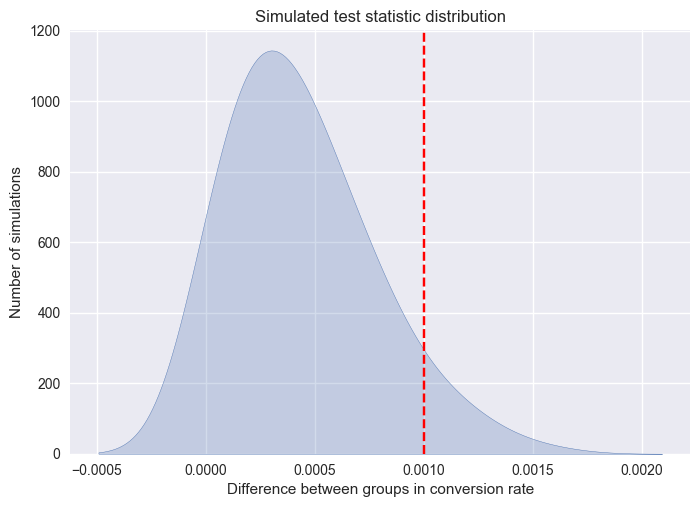

In [14]:
# графік з результатом

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
# Plot permutaion simulated differences
density = sns.kdeplot(simulated_differences, fill=True, bw_adjust=2)  # bw_adjust - це параметр, який визначає ширину ядра. Чим вище значення, тим ширше ядро.
density.set(
    xlabel="Difference between groups in conversion rate",
    ylabel="Number of simulations",
    title="Simulated test statistic distribution",
)

density.axvline(x=observed_differece, color="red", linestyle="--")
plt.show()

Бачимо що не настільки часто бачимо таку різницю як у нас фактично

In [15]:
diffs = np.array(simulated_differences)

len(diffs[diffs >= observed_differece]) / len(
    diffs
)  # дивимось як часто різниця була більшою за наш observed_differece

0.092

Аналогом якої метрики з t-test є отримана мерика?
Якщо 50% такі як у нас в спостреженні - який висновок? 

In [16]:
if (len(diffs[diffs >= observed_differece])) / len(diffs) < alpha:
    print("The difference is statistically significant, Null Hypothesis is rejected.")
else:
    print("The difference is insignificant, Null Hypothesis cannot rejected.")

# Відхиляємо нульову гіпотезу та робимо висновок, що різниця між нашими групами з тесту є статистично значущою.

The difference is insignificant, Null Hypothesis cannot rejected.


1. часто більш практично примінимі результати будуть в тесті з перестановками ніж в тесті Стьюдента коли мало конверсій у штуках
2. Коли рахуємо не конверсію я сумму чи час

# Visualization

#### Перевіримо на практиці центральну граничну теорему

In [17]:
a_size = len(a)  # розмір вибірки a = 10 000
# Нульова гіпотеза про те що зміни не впливають на конверсії (тобто якщо будь які інші групи утворимо то така сама різниця в конверсії)
permulation_number = 10000
sample_means = []

for i in range(permulation_number):
    sample = np.random.choice(all_users, a_size)
    sample_means.append( np.mean(sample))

len(sample_means)  # 10000

10000

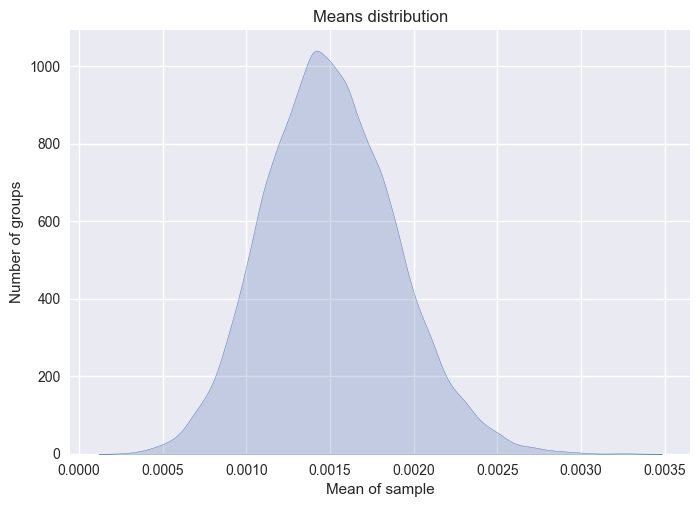

In [18]:
# графік з результатом

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
density = sns.kdeplot(sample_means, fill=True
                      #, bw_adjust=2
                      )
density.set(
    xlabel="Mean of sample",
    ylabel="Number of groups",
    title="Means distribution",
)

plt.show()

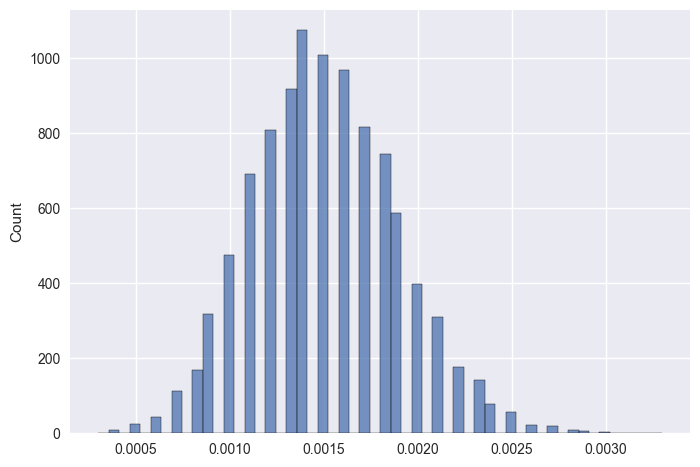

In [19]:
sns.histplot(sample_means)
plt.show()

# Візуалізація розподілів двох груп

In [20]:
a_size = len(a)  # розмір вибірки a = 10 000
# Нульова гіпотеза про те що зміни не впливають на конверсії (тобто якщо будь які інші групи утворимо то така сама різниця в конверсії)
permulation_number = 50000
sample_means_a = []
sample_means_b = []


for i in range(permulation_number):
    sample_a = np.random.choice(all_users, a_size)
    sample_means_a.append(np.mean(sample_a))

    sample_b = np.random.choice(all_users, a_size)
    sample_means_b.append(np.mean(sample_b))

len(sample_means)  # 10000

10000

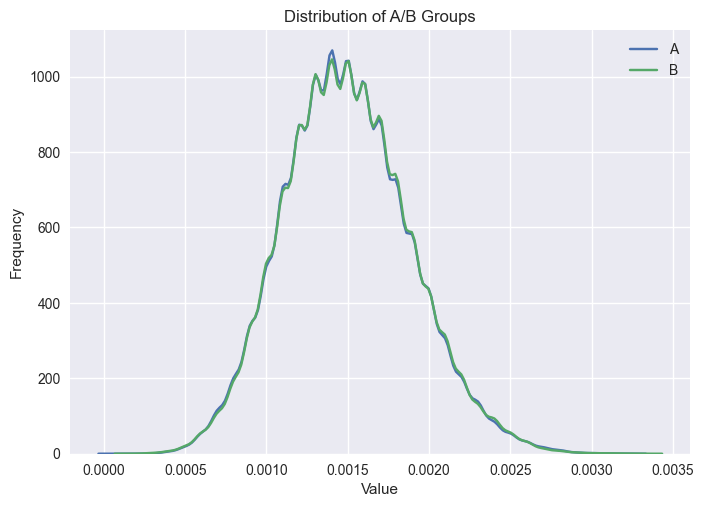

In [21]:
density = sns.kdeplot(  # kdeplot - це графік щільності розподілу
    sample_means_a,
    # fill=True
    # , bw_adjust=2
)

density = sns.kdeplot(  # kdeplot - це графік щільності розподілу
    sample_means_b,
    # fill=True
    # , bw_adjust=2
)

plt.title("Distribution of A/B Groups")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.legend(["A", "B"])

plt.show()

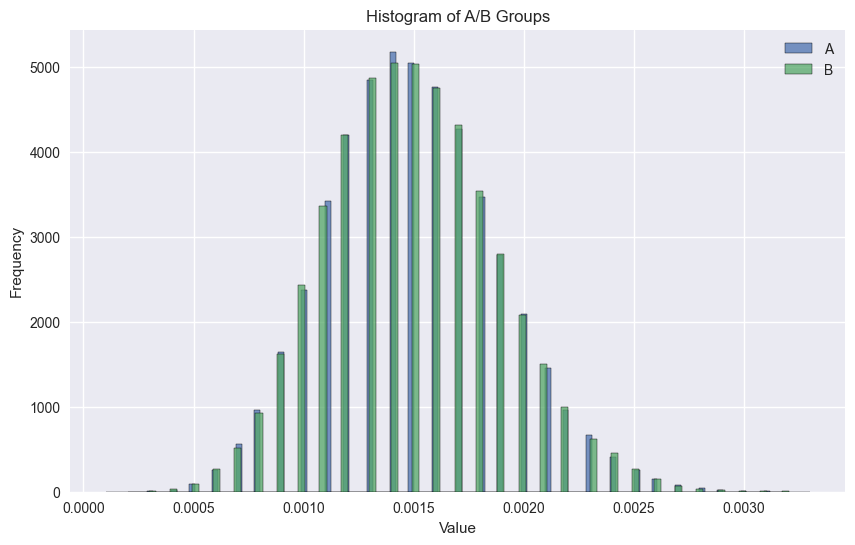

In [22]:
plt.figure(figsize=(10, 6))

sns.histplot(sample_means_a)
sns.histplot(sample_means_b)

plt.title("Histogram of A/B Groups")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.legend(["A", "B"])
plt.show()

#### Порівняння 2 груп з довірчими інтервалами


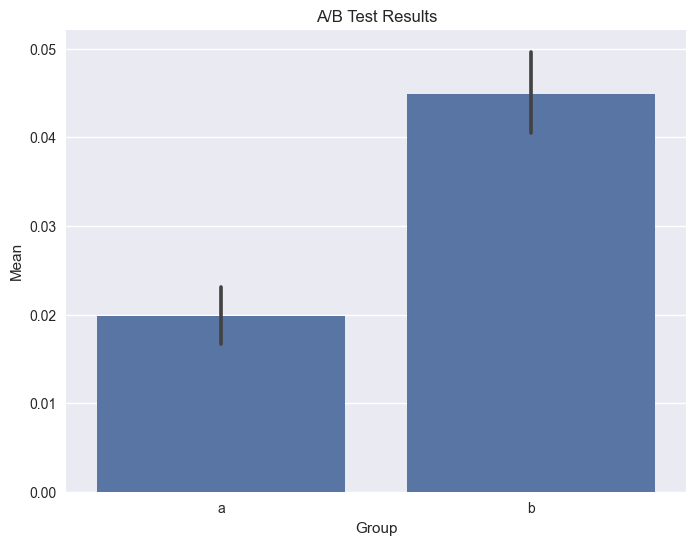

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")

plt.figure(figsize=(8, 6))
sns.barplot(
    x=test_data["test_group"], y=test_data["conversion"], errorbar=("ci", 95)
)  # Confidence Intervals

plt.title("A/B Test Results")
plt.xlabel("Group")
plt.ylabel("Mean")

plt.show()

Візуалізація розподілу Q&A

In [24]:
stats.norm.rvs(
    size=1000
)  # випадкові величини з нормальним розподілом з 1000 спостережень (rvs - random values)

array([ 8.78927560e-01, -1.34683151e+00, -9.73102871e-01, -1.05411264e+00,
        1.00572450e+00,  1.29117789e-01,  1.38931835e-01, -7.38024305e-01,
        3.74607170e-01, -1.56109094e+00, -7.19580356e-01,  6.92454302e-01,
       -3.29237030e-01, -3.77338050e-02,  9.44739812e-01, -4.54337516e-01,
        1.04031952e+00,  5.75050178e-01, -2.04641278e+00, -1.06505302e+00,
        9.23920562e-01,  1.35801522e+00,  7.10629854e-01,  1.65757530e+00,
        6.78730019e-01, -6.66607522e-01,  6.72233231e-01, -4.30693273e-01,
        1.55581051e-01,  3.16412685e-01,  3.17807449e-01, -2.08763499e+00,
        3.64195366e-01, -3.73373431e-01, -9.96667988e-01, -6.12896495e-02,
        3.31848100e-01, -2.09699807e+00,  1.76660407e+00,  1.88413960e+00,
       -7.00887022e-01,  7.89023103e-01, -3.11541437e-01, -9.97785556e-01,
       -4.12915620e-01,  4.46967828e-01,  2.21091352e+00, -2.93140774e-01,
        6.10665263e-01,  3.11300480e-01, -1.40016909e+00, -5.50927863e-01,
        3.51594370e-03,  

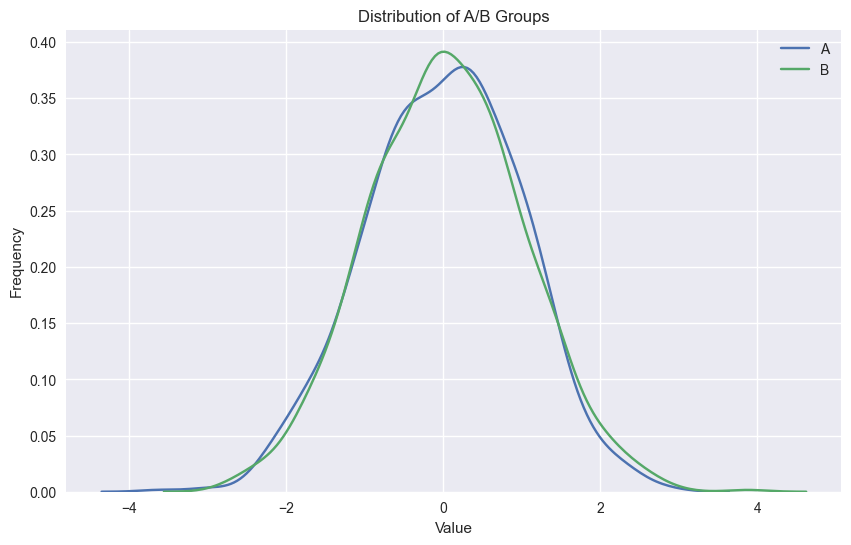

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.kdeplot(stats.norm.rvs(size=1000))
sns.kdeplot(stats.norm.rvs(size=1000))

plt.title("Distribution of A/B Groups")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.legend(["A", "B"])
plt.show()